# Web Scrapping

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd 
import numpy as np

In [4]:
# driver = webdriver.Chrome()
# driver.get("https://www.iproperty.com.my/sale/penang/all-residential/")

# time.sleep(3) 

# for i in range(25):
#     try:
#         # property_container = driver.find_element(By.XPATH, ".//div[@class='ListingsListstyle__ListingResultPage-iIneXB dBXYzA']")
#         property_container = driver.find_element(By.XPATH, "//ul[@class='ListingsListstyle__ListingsListContainer-dAfITF hkxQlK listing-list']")
#         print(property_container)
#         properties = property_container.find_elements(By.CSS_SELECTOR, ".ListingsListstyle__ListingListItemWrapper-hjHtwj.eUjjMH.sale-102366737")
        
#         properties[i].click()
#         time.sleep(2)  # Wait for the new page to load
        
#         # Extract the property name using the correct selector
#         property_name = WebDriverWait(driver, 10).until(
#             EC.presence_of_element_located((By.TAG_NAME, "h1"))
#         ).text
        
#         property_address = WebDriverWait(driver, 10).until(
#             EC.presence_of_element_located((By.TAG_NAME, "h3"))
#         ).text

#         property_size = WebDriverWait(driver, 10).until(
#             EC.presence_of_element_located((By.XPATH, ".//div[@class='ListingDescriptionstyle__Headline-CtOKw gDpweD']"))
#         ).text

#         try:
#             show_more_button = WebDriverWait(driver, 10).until(
#                 EC.presence_of_element_located((By.XPATH, ".//div[@id='property-details']//a[contains(text(),'Show more')]"))
#             )
#             show_more_button.click()
#             time.sleep(1)  
#         except:
#             # print("No 'Show More' button found, or couldn't click it.")
#             print(0)

#         try:
#         # Extract the property details
#             property_details = WebDriverWait(driver, 5).until(
#             EC.presence_of_element_located((By.XPATH, ".//div[@id='property-details']"))
#             ).text
            
#         except: 
#             # print('No property details skipping for now.')
#             # same thing but just to clean data easier 
#             print(0)
        
#         # print(f"Property Name: {property_name}, Property Address: {property_address}, Property Size: {property_size}")
#         # print(f'Property Details: {property_details}')
        
#         driver.back()  # Go back to the listings page
#         time.sleep(3)
        
#     except Exception as e:
#         print(f"Error: {e}")
#         continue

# driver.quit()

In [5]:
# driver = webdriver.Chrome()
# driver.get("https://www.iproperty.com.my/sale/penang/all-residential/")
# time.sleep(3)

# try:
#     property_container = WebDriverWait(driver, 10).until(
#         EC.presence_of_element_located((By.XPATH, "//ul[@class='ListingsListstyle__ListingsListContainer-dAfITF hkxQlK listing-list']"))
#     )
#     properties = property_container.find_elements(By.XPATH, ".//li[contains(@class, 'ListingsListstyle__ListingListItemWrapper-hjHtwj')]")

#     print(f"Found {len(properties)} properties")

#     for prop in properties:
#         try:
#             property_name = prop.find_element(By.XPATH, ".//h2").text
#             property_price = prop.find_element(By.XPATH, "//li[@class='ListingPricestyle__ItemWrapper-etxdML ejAiy']").text
#             # property_details = prop.find_element(By.XPATH, "//p[contains(@class, 'ListingAttributesstyle__ListingAttrsDescriptionItemWrapper') and contains(@class, 'attributes-description-item')]").text
            
#             prop.click()
#             try:
#                 show_more_button = WebDriverWait(driver, 10).until(
#                     EC.presence_of_element_located((By.XPATH, ".//div[@id='property-details']//a[contains(text(),'Show more')]"))
#                 )
#                 show_more_button.click()
#                 time.sleep(1)  
#             except:
#                 # print("No 'Show More' button found, or couldn't click it.")
#                 print(0)
    
#             try:
#                 # Extract the property details
#                 property_details = WebDriverWait(driver, 10).until(
#                 EC.presence_of_element_located((By.XPATH, "//div[@id='property-details']"))
#                 ).text
                
#             except: 
#                 # print('No property details skipping for now.')
#                 # same thing but just to clean data easier 
#                 print(0)

#             driver.back()  # Go back to the listings page
#             time.sleep(2)
            
            
#             print(f"Property Name: {property_name}")
#             print(f"Price: {property_price}")
#             print(f"Details: {property_details}")
#             print("-" * 50)

#         except Exception as e:
#             print(f"Error extracting property details: {e}")

# except Exception as e:
#     print(f"Error: {e}")

# finally:
#     driver.quit()

# Dataset (from the goat)

In [7]:
df = pd.read_csv('mudah-apartment-kl-selangor.csv')
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


# Data Cleaning (handling missing values)

In [9]:
df.columns

Index(['ads_id', 'prop_name', 'completion_year', 'monthly_rent', 'location',
       'property_type', 'rooms', 'parking', 'bathroom', 'size', 'furnished',
       'facilities', 'additional_facilities', 'region'],
      dtype='object')

In [10]:
df.isna().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

# copy df to compare later

In [13]:
df_cleaned = df.copy()
df_cleaned.head(1)

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur


In [14]:
df_cleaned = df_cleaned.drop(['ads_id', 'completion_year'], axis=1)

In [15]:
df_cleaned['prop_name'] = df_cleaned['prop_name'].fillna('unknown')

In [16]:
df_cleaned.drop(df_cleaned[df_cleaned['monthly_rent'] == 'RM 70 per month'].index,axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['monthly_rent'] == 'RM 85 per month'].index,axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['monthly_rent'] == 'RM 80 per month'].index,axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['monthly_rent'] == 'RM 90 per month'].index,axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['size'] == '1 sq.ft.'].index,axis=0, inplace=True)

In [17]:
# replacing all the unwanted strings in data and eliminating the whitespace with regex 
df_cleaned['monthly_rent(RM)'] = df_cleaned['monthly_rent'].str.replace('RM', '').str.replace('per month', '').str.replace(r'\s+', '', regex=True).fillna(0).astype(float)


In [18]:
df_cleaned['monthly_rent(RM)'] = df_cleaned['monthly_rent(RM)'].fillna(df_cleaned['monthly_rent(RM)'].mean())

In [19]:
df_cleaned['rooms']

0          5
1          3
2          3
3          2
4          1
        ... 
19986    3.0
19987    4.0
19988    3.0
19989    3.0
19990    1.0
Name: rooms, Length: 19978, dtype: object

In [20]:
df_cleaned['monthly_rent'].unique()

array(['RM 4 200 per month', 'RM 2 300 per month', 'RM 1 000 per month',
       'RM 1 700 per month', 'RM 1 299 per month', 'RM 1 500 per month',
       'RM 2 900 per month', 'RM 1 550 per month', 'RM 1 400 per month',
       'RM 1 350 per month', 'RM 2 600 per month', 'RM 2 000 per month',
       'RM 1 300 per month', 'RM 3 200 per month', 'RM 2 500 per month',
       'RM 1 800 per month', 'RM 1 099 per month', 'RM 1 199 per month',
       'RM 1 100 per month', 'RM 1 750 per month', 'RM 1 900 per month',
       'RM 2 400 per month', 'RM 4 500 per month', 'RM 3 000 per month',
       'RM 1 600 per month', 'RM 2 100 per month', 'RM 1 850 per month',
       'RM 2 700 per month', 'RM 7 000 per month', 'RM 900 per month',
       'RM 7 800 per month', 'RM 850 per month', 'RM 1 650 per month',
       'RM 1 200 per month', 'RM 2 599 per month', 'RM 2 200 per month',
       'RM 700 per month', 'RM 1 399 per month', 'RM 1 450 per month',
       'RM 3 300 per month', 'RM 3 700 per month', 'RM 99

In [21]:
df_cleaned['monthly_rent(RM)'].isna().sum()

0

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19978 entries, 0 to 19990
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prop_name              19978 non-null  object 
 1   monthly_rent           19976 non-null  object 
 2   location               19978 non-null  object 
 3   property_type          19978 non-null  object 
 4   rooms                  19973 non-null  object 
 5   parking                14279 non-null  float64
 6   bathroom               19973 non-null  float64
 7   size                   19978 non-null  object 
 8   furnished              19974 non-null  object 
 9   facilities             17769 non-null  object 
 10  additional_facilities  14038 non-null  object 
 11  region                 19978 non-null  object 
 12  monthly_rent(RM)       19978 non-null  float64
dtypes: float64(3), object(10)
memory usage: 2.1+ MB


In [23]:
df_cleaned = df_cleaned.drop('monthly_rent', axis=1)

In [24]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# objects = df_cleaned.select_dtypes(include='object')
# for col in objects:
#     df_cleaned[col] = label_encoder.fit_transform(objects[col])

In [25]:
df_cleaned['bathroom'] = df_cleaned['bathroom'].fillna(0).astype(int)
df_cleaned['bathroom']

0        6
1        2
2        2
3        2
4        1
        ..
19986    2
19987    3
19988    2
19989    2
19990    1
Name: bathroom, Length: 19978, dtype: int64

In [26]:
df_cleaned['parking'] = df_cleaned['parking'].fillna(0).astype(int)
df_cleaned['parking']

0        2
1        1
2        0
3        1
4        1
        ..
19986    0
19987    2
19988    2
19989    1
19990    1
Name: parking, Length: 19978, dtype: int64

In [27]:
df_cleaned.furnished = df_cleaned.furnished.replace(np.nan, 'unknown')
df_cleaned.furnished.isna().sum()

0

In [28]:
df_cleaned.facilities = df_cleaned.facilities.replace(np.nan, 'unknown')
df_cleaned.facilities.isna().sum()

0

In [29]:
df_cleaned.additional_facilities = df_cleaned.additional_facilities.replace(np.nan, 'unknown')
df_cleaned.additional_facilities.isna().sum()

0

---

# Feature engineering 

In [32]:
df_cleaned.columns

Index(['prop_name', 'location', 'property_type', 'rooms', 'parking',
       'bathroom', 'size', 'furnished', 'facilities', 'additional_facilities',
       'region', 'monthly_rent(RM)'],
      dtype='object')

---

## Average Monthly Price per Facilities

In [35]:
df_cleaned = df_cleaned.reset_index()

In [36]:
normal_facilities = df_cleaned['facilities'].str.split(',', expand=True)
normal_facilities = normal_facilities.fillna('na')
normal_facilities = normal_facilities.reset_index()
normal_facilities

extra_facilities = df_cleaned['additional_facilities'].str.split(',', expand=True).fillna('na').reset_index()
extra_facilities

# total_facilities = pd.concat([normal_facilities, extra_facilities], axis=1)
total_facilities = pd.merge(normal_facilities, extra_facilities, how="inner", on=["index", "index"])
total_facilities

,index,0_x,1_x,2_x,3_x,4_x,5_x,6,7,8,...,10,11,12,13,0_y,1_y,2_y,3_y,4_y,5_y
0,0,Minimart,Gymnasium,Security,Playground,Swimming Pool,Parking,Lift,Barbeque area,Multipurpose hall,...,na,na,na,na,Air-Cond,Cooking Allowed,Washing Machine,na,na,na
1,1,Playground,Parking,Barbeque area,Security,Jogging Track,Swimming Pool,Gymnasium,Lift,Sauna,...,na,na,na,na,Air-Cond,Cooking Allowed,Near KTM/LRT,na,na,na
2,2,Minimart,Jogging Track,Lift,Swimming Pool,na,na,na,na,na,...,na,na,na,na,unknown,na,na,na,na,na
3,3,Parking,Playground,Swimming Pool,Squash Court,Security,Minimart,Gymnasium,Lift,na,...,na,na,na,na,Cooking Allowed,Near KTM/LRT,Washing Machine,na,na,na
4,4,Parking,Security,Lift,Swimming Pool,Playground,Gymnasium,Barbeque area,Minimart,Multipurpose hall,...,Jogging Track,na,na,na,Air-Cond,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19973,19973,Security,Parking,Lift,Minimart,Multipurpose hall,Playground,Jogging Track,na,na,...,na,na,na,na,Near KTM/LRT,na,na,na,na,na
19974,19974,Jogging Track,Barbeque area,Playground,Swimming Pool,Tennis Court,Sauna,na,na,na,...,na,na,na,na,Air-Cond,Cooking Allowed,na,na,na,na
19975,19975,Parking,Security,Lift,Swimming Pool,Playground,Gymnasium,Multipurpose hall,na,na,...,na,na,na,na,Air-Cond,Cooking Allowed,Washing Machine,na,na,na
19976,19976,Parking,Security,Lift,Swimming Pool,Playground,Gymnasium,Sauna,Barbeque area,Minimart,...,Club house,Jogging Track,Tennis Court,Squash Court,Cooking Allowed,Washing Machine,na,na,na,na


In [37]:
fac_col_name = total_facilities.columns
new_fac_col_names = ['facility'+ str(i) for i in range(0,len(fac_col_name))]
total_facilities.columns = new_fac_col_names
total_facilities.rename(columns={'facility0': 'index'}, inplace=True)
total_facilities.head()

,index,facility1,facility2,facility3,facility4,facility5,facility6,facility7,facility8,facility9,...,facility11,facility12,facility13,facility14,facility15,facility16,facility17,facility18,facility19,facility20
0,0,Minimart,Gymnasium,Security,Playground,Swimming Pool,Parking,Lift,Barbeque area,Multipurpose hall,...,na,na,na,na,Air-Cond,Cooking Allowed,Washing Machine,na,na,na
1,1,Playground,Parking,Barbeque area,Security,Jogging Track,Swimming Pool,Gymnasium,Lift,Sauna,...,na,na,na,na,Air-Cond,Cooking Allowed,Near KTM/LRT,na,na,na
2,2,Minimart,Jogging Track,Lift,Swimming Pool,na,na,na,na,na,...,na,na,na,na,unknown,na,na,na,na,na
3,3,Parking,Playground,Swimming Pool,Squash Court,Security,Minimart,Gymnasium,Lift,na,...,na,na,na,na,Cooking Allowed,Near KTM/LRT,Washing Machine,na,na,na
4,4,Parking,Security,Lift,Swimming Pool,Playground,Gymnasium,Barbeque area,Minimart,Multipurpose hall,...,Jogging Track,na,na,na,Air-Cond,na,na,na,na,na


In [38]:
df_new = pd.merge(df_cleaned, total_facilities, how="inner", on=["index", "index"])
df_new = df_new.drop(['index'], axis=1)
df_new.columns

Index(['prop_name', 'location', 'property_type', 'rooms', 'parking',
       'bathroom', 'size', 'furnished', 'facilities', 'additional_facilities',
       'region', 'monthly_rent(RM)', 'facility1', 'facility2', 'facility3',
       'facility4', 'facility5', 'facility6', 'facility7', 'facility8',
       'facility9', 'facility10', 'facility11', 'facility12', 'facility13',
       'facility14', 'facility15', 'facility16', 'facility17', 'facility18',
       'facility19', 'facility20'],
      dtype='object')

In [39]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

columns_needed = [
    'facility1', 'facility2', 'facility3', 'facility4', 'facility5',
    'facility6', 'facility7', 'facility8', 'facility9', 'facility10',
    'facility11', 'facility12', 'facility13', 'facility14', 'facility15',
    'facility16', 'facility17', 'facility18', 'facility19', 'facility20'
]

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = encoder.fit_transform(df_new[columns_needed])
encoded_feature_names = encoder.get_feature_names_out(columns_needed)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names)

encoded_df = encoded_df.astype(int)
# regex from chatgpt
encoded_df.columns = encoded_df.columns.str.replace(r'facility\d+_', '', regex=True)

# combine both new and encoded data 
df_new = pd.concat([df_new, encoded_df], axis=1)
df_new.head()

,prop_name,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,...,Internet,Near KTM/LRT,Washing Machine,na,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine,na,na
0,The Hipster @ Taman Desa,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",...,0,0,0,1,0,0,0,0,1,1
1,Segar Courts,Kuala Lumpur - Cheras,Condominium,3,1,2,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",...,0,0,0,1,0,0,0,0,1,1
2,Pangsapuri Teratak Muhibbah 2,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",unknown,...,0,0,0,1,0,0,0,0,1,1
3,Sentul Point Suite Apartment,Kuala Lumpur - Sentul,Apartment,2,1,2,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",...,0,0,0,1,0,0,0,0,1,1
4,Arte Mont Kiara,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,...,0,0,0,1,0,0,0,0,1,1


In [40]:
df_new = df_new.drop(['facility1', 'facility2', 'facility3', 'facility4', 'facility5',
    'facility6', 'facility7', 'facility8', 'facility9', 'facility10',
    'facility11', 'facility12', 'facility13', 'facility14', 'facility15',
    'facility16', 'facility17', 'facility18', 'facility19', 'facility20'], axis=1)

In [41]:
round(df_new.groupby(['property_type', 'facilities', 'additional_facilities'])['monthly_rent(RM)'].mean().sort_values(ascending=False).reset_index()).head(6)

,property_type,facilities,additional_facilities,monthly_rent(RM)
0,Condominium,"Security, Playground, Tennis Court, Barbeque a...","Air-Cond, Cooking Allowed, Washing Machine",2400000.0
1,Condominium,"Parking, Security, Swimming Pool, Jogging Track","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",780000.0
2,Condominium,"Parking, Security, Minimart, Squash Court, Pla...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",580000.0
3,Service Residence,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Air-Cond",580000.0
4,Condominium,"Minimart, Swimming Pool, Club house, Gymnasium...",unknown,580000.0
5,Condominium,"Multipurpose hall, Parking, Gymnasium, Securit...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",550000.0


## Average parking space in each property_type 

In [43]:
round(df_new.groupby(['property_type', 'parking'])['monthly_rent(RM)'].mean().sort_values(ascending=False).reset_index())

,property_type,parking,monthly_rent(RM)
0,Condominium,3,26012.0
1,Duplex,3,4867.0
2,Service Residence,4,4412.0
3,Condominium,4,4228.0
4,Condominium,2,3084.0
5,Townhouse Condo,0,2957.0
6,Duplex,2,2629.0
7,Service Residence,2,2615.0
8,Service Residence,3,2592.0
9,Apartment,7,2500.0


---

## Average room and price in different property_type 

In [46]:
df_new.groupby(['property_type', 'rooms'])['monthly_rent(RM)'].mean().sort_values(ascending=False).round().reset_index().head(10)

,property_type,rooms,monthly_rent(RM)
0,Townhouse Condo,4,8062.0
1,Condominium,7,8040.0
2,Condominium,4,7172.0
3,Service Residence,6.0,5868.0
4,Duplex,7,5800.0
5,Apartment,2,5215.0
6,Condominium,6,5137.0
7,Studio,2,5000.0
8,Service Residence,4,4909.0
9,Condominium,5,4293.0


---

### Average price with properties that has security 

In [49]:
round(df_new.groupby(['property_type', 'Security'])['monthly_rent(RM)'].mean().sort_values(ascending=False).reset_index())

,property_type,Security,monthly_rent(RM)
0,Condominium,1,2901.0
1,Condominium,0,2684.0
2,Townhouse Condo,0,2497.0
3,Service Residence,0,2432.0
4,Apartment,1,2131.0
5,Duplex,0,1925.0
6,Service Residence,1,1869.0
7,Duplex,1,1806.0
8,Flat,0,1730.0
9,Townhouse Condo,1,1533.0


---

### Average price based on region in KL  

In [52]:
AveragePrice = df_new.groupby(['region', 'property_type'])['monthly_rent(RM)'].mean().reset_index()
round(AveragePrice)

,region,property_type,monthly_rent(RM)
0,Kuala Lumpur,Apartment,2150.0
1,Kuala Lumpur,Condo / Services residence / Penthouse / Townh...,150.0
2,Kuala Lumpur,Condominium,3187.0
3,Kuala Lumpur,Duplex,2153.0
4,Kuala Lumpur,Flat,1659.0
5,Kuala Lumpur,Others,1622.0
6,Kuala Lumpur,Residential,100.0
7,Kuala Lumpur,Service Residence,2738.0
8,Kuala Lumpur,Studio,1758.0
9,Kuala Lumpur,Townhouse Condo,4661.0


---

# Cleaning the featured engineering data (In another file) 

In [895]:
df_new = pd.read_csv('featured_data.csv')
df_new.head()

,property_type,rooms,parking,bathroom,size,region,monthly_rent(RM),Gymnasium,Lift,Minimart,Sauna,Security,Swimming Pool
0,Condominium,5.0,2,6,1842.0,Kuala Lumpur,4200.0,0,0,1,0,0,0
1,Condominium,3.0,1,2,1170.0,Kuala Lumpur,2300.0,0,0,0,0,0,0
2,Apartment,3.0,1,2,650.0,Kuala Lumpur,1000.0,0,0,1,0,0,0
3,Apartment,2.0,1,2,743.0,Kuala Lumpur,1700.0,0,0,0,0,0,0
4,Service Residence,1.0,1,1,494.0,Kuala Lumpur,1299.0,0,0,0,0,0,0


---

# EDA 
 - Conduct descriptive statistics
 - Visualize data distributions and relationships
 - Identify patterns and trends
 - Formulate hypotheses based on observations

In [899]:
df_new.head(3)

,property_type,rooms,parking,bathroom,size,region,monthly_rent(RM),Gymnasium,Lift,Minimart,Sauna,Security,Swimming Pool
0,Condominium,5.0,2,6,1842.0,Kuala Lumpur,4200.0,0,0,1,0,0,0
1,Condominium,3.0,1,2,1170.0,Kuala Lumpur,2300.0,0,0,0,0,0,0
2,Apartment,3.0,1,2,650.0,Kuala Lumpur,1000.0,0,0,1,0,0,0


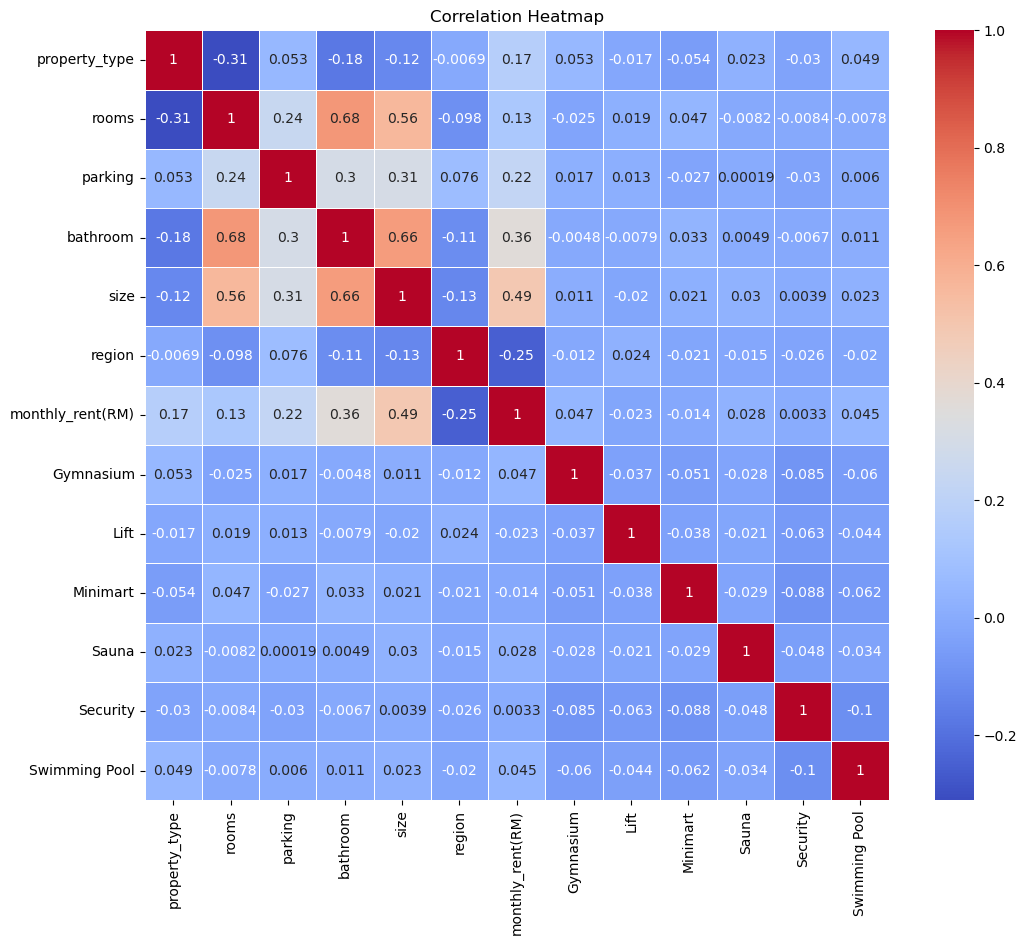

In [68]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
label_encoder = LabelEncoder()
df_encoded = df_new.copy()

objects = df_new.select_dtypes(include='object')
for col in objects:
    df_encoded[col] = label_encoder.fit_transform(objects[col])
    
correlation_matrix =  df_encoded.corr(numeric_only=False)
correlation_matrix

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Average price based on region

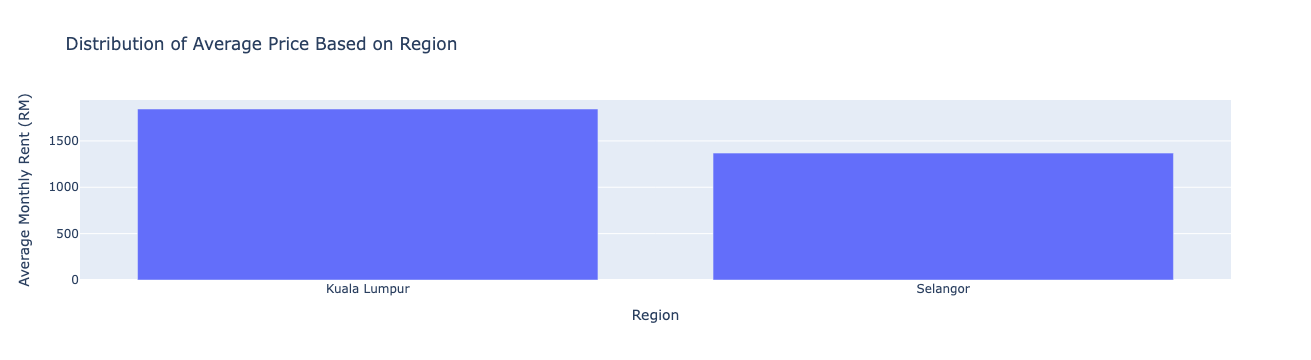

In [902]:
import plotly.express as px
AveragePrice = df_new.groupby(['region'])['monthly_rent(RM)'].mean().reset_index()


fig = px.bar(
    AveragePrice, 
    x='region',  
    y='monthly_rent(RM)', 
    title='Distribution of Average Price Based on Region', 
    labels={'region': 'Region', 'monthly_rent(RM)': 'Average Monthly Rent (RM)'}
)

fig.show()

---

## Average Monthly Price with Security

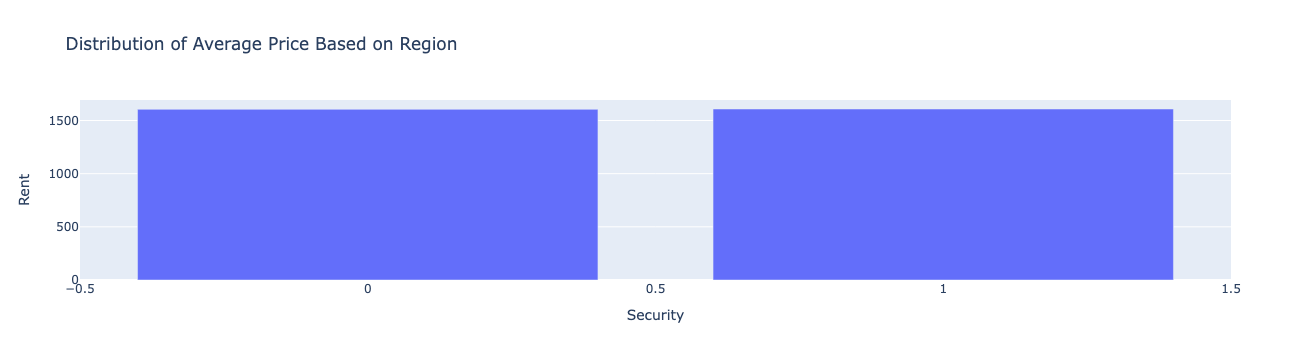

In [904]:
AverageWithSecurity = df_new.groupby('Security')['monthly_rent(RM)'].mean().reset_index()

fig = px.bar(
    AverageWithSecurity, 
    y='monthly_rent(RM)',  
    x='Security', 
    title='Distribution of Average Price Based on Region', 
    labels={'monthly_rent(RM)': 'Rent', 'Security': 'Security'}
)

fig.show()

### Distribution of Average price based on property type

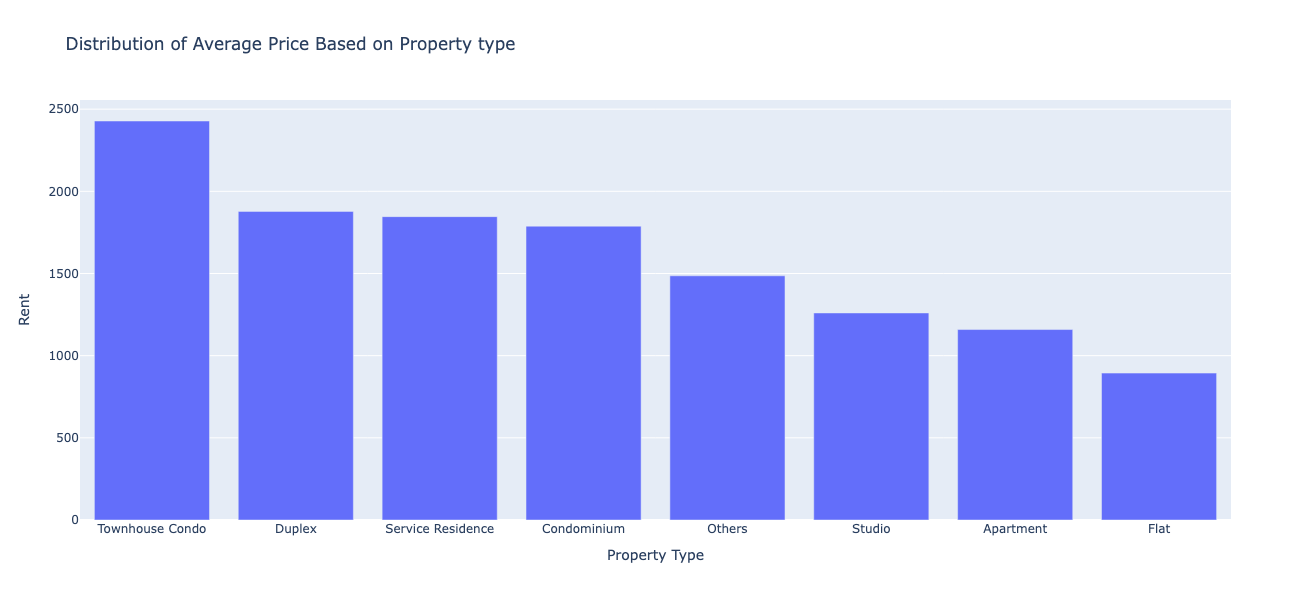

In [906]:
AveragePropertyType = df_new.groupby('property_type')['monthly_rent(RM)'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(
    AveragePropertyType.round(), 
    y='monthly_rent(RM)',  
    x='property_type', 
    width= 900,
    height= 600,
    title='Distribution of Average Price Based on Property type', 
    labels={'monthly_rent(RM)': 'Rent', 'property_type': 'Property Type'}
)

fig.show()

---

### Distribution of Average Price based on Rent

In [814]:
df_new.rooms.unique()

array([5., 3., 2., 1., 4., 7., 6., 9.])

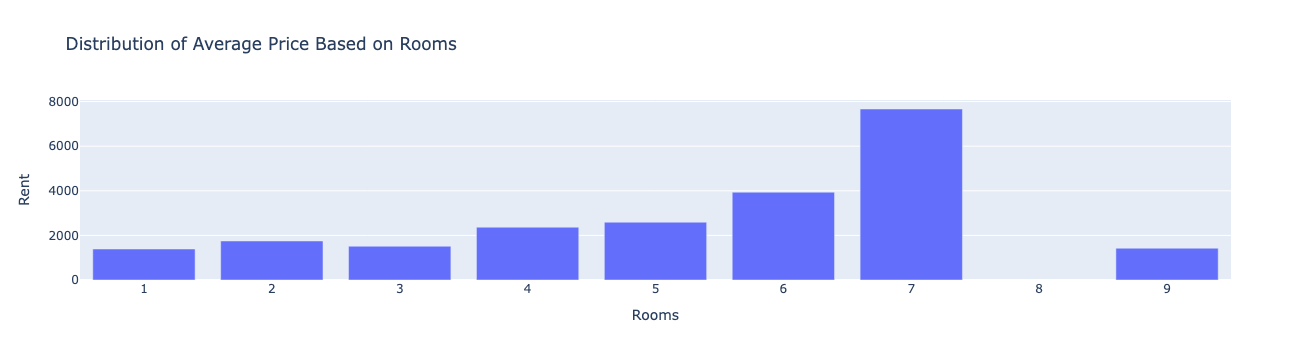

In [910]:
AverageRooms = df_new.groupby('rooms')['monthly_rent(RM)'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(
    AverageRooms.round(), 
    y='monthly_rent(RM)',  
    x='rooms', 
    # width= 900,
    # height= 900,
    title='Distribution of Average Price Based on Rooms', 
    labels={'monthly_rent(RM)': 'Rent', 'rooms': 'Rooms'}
)

fig.show()

---

# Distribution of Average Rent for Apartments Based on Number of Rooms

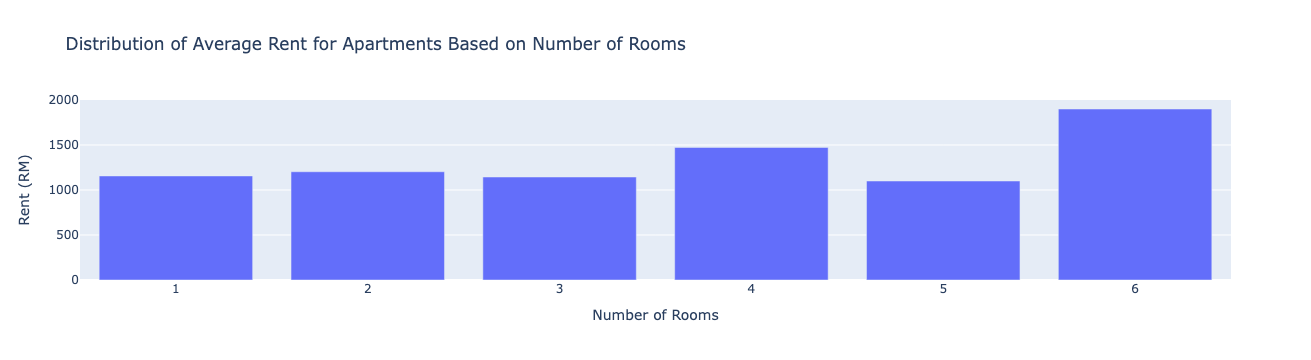

In [914]:
apartments_only = df_new[df_new['property_type'] == 'Apartment']

apartments_avg_rent = apartments_only.groupby(['rooms'])['monthly_rent(RM)'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    apartments_avg_rent, r
    x='rooms', 
    y='monthly_rent(RM)',  
    # width=900,
    # height=600,
    title='Distribution of Average Rent for Apartments Based on Number of Rooms', 
    labels={'monthly_rent(RM)': 'Rent (RM)', 'rooms': 'Number of Rooms'},
)

fig.show()

---

### Distribution of Average price based on parking space

In [824]:
# Note that some properties that are few 100k and above are maybe to buy not to rent properties

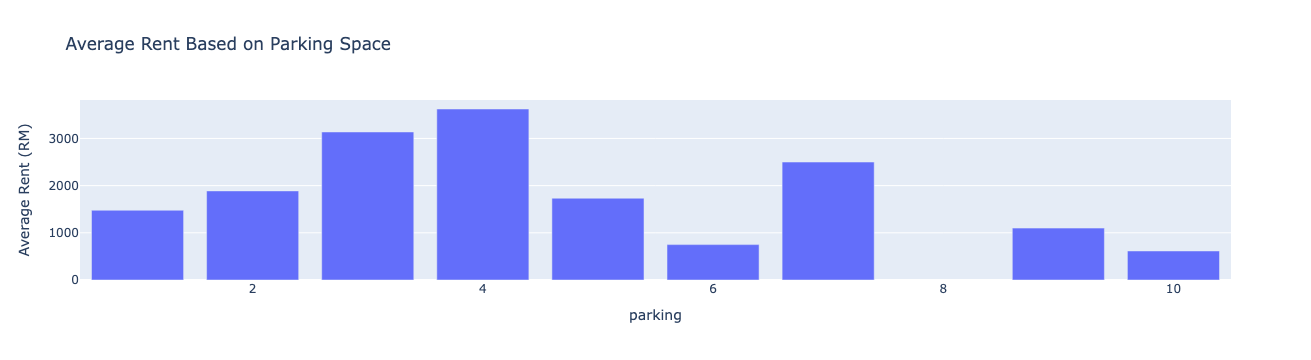

In [938]:
parking = df_new.groupby('parking')['monthly_rent(RM)'].mean().round().reset_index()
px.bar(parking, x='parking', y='monthly_rent(RM)',  
       title='Average Rent Based on Parking Space', hover_data=['parking'], 
        labels={'monthly_rent(RM)': 'Average Rent (RM)'})

---

# Hypotheses based on observations

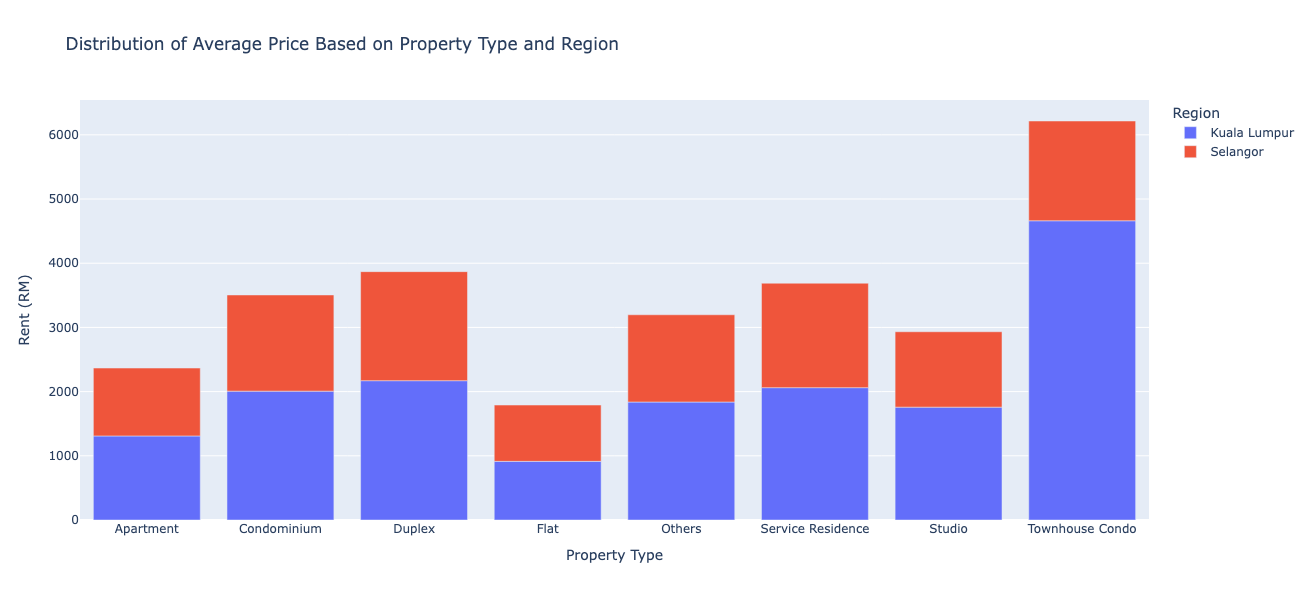

In [918]:
region_property_type = df_new.groupby(['property_type', 'region'])['monthly_rent(RM)'].mean().reset_index()
region_property_type
fig = px.bar(
    region_property_type, 
    x='property_type', 
    y='monthly_rent(RM)',  
    width=900,
    height=600,
    title='Distribution of Average Price Based on Property Type and Region', 
    labels={'monthly_rent(RM)': 'Rent (RM)', 'property_type': 'Property Type', 'region': 'Region'},
    hover_data=['region'],
    color='region'
)

fig.show()

---

# Relevant statistical tests

In [82]:
apartment_selangor_mean_rent = df_new[(df_new['property_type'] == 'Apartment') & (df_new['region'] == 'Selangor')]['monthly_rent(RM)']
apartment_kl_mean_rent = df_new[(df_new['property_type'] == 'Apartment') & (df_new['region'] == 'Kuala Lumpur')]['monthly_rent(RM)']
apartment_selangor_mean_rent,apartment_kl_mean_rent

(9481     1300.0
 9483     1800.0
 9485      900.0
 9486      500.0
 9491     1000.0
           ...  
 19005     850.0
 19007     450.0
 19011     750.0
 19019    1100.0
 19023    1200.0
 Name: monthly_rent(RM), Length: 3011, dtype: float64,
 2       1000.0
 3       1700.0
 5       1500.0
 8       1400.0
 14      1000.0
          ...  
 9440    1500.0
 9458    2100.0
 9461    1090.0
 9464    1000.0
 9474    1000.0
 Name: monthly_rent(RM), Length: 2036, dtype: float64)

In [940]:
# H0 - Monthly Rent for Apartments is Selangor is not Lower than KL
# HA = Monthly Rent for Apartments is Selangor is Lower than KL

In [942]:
from scipy import stats 

t_test,p_val = stats.ttest_ind(apartment_selangor_mean_rent, 
                apartment_kl_mean_rent,nan_policy='omit', axis=0)
t_test,p_val

(-2.599811702900159, 0.009354677495200671)

In [944]:
if p_val < 0.05:
    print("Reject the null hypothesis: The average rent for apartments in Selangor is significantly lower than in KL.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average rent for apartments in Selangor and KL.")

Reject the null hypothesis: The average rent for apartments in Selangor is significantly lower than in KL.


---

# Insights and recommendations

1. Conclusion
   - The average rent for apartments in Selangor is significantly lower than in Kuala Lumpur (KL). This likely is due to KL's status as a central buiness hub / city area
2. Recommendations
   - Renters who prioritize cost savings, looking for apartments in Selangor rather than KL can offer significant savings, with rents begin lower on average. This couldbe beneficial for those who do not require daily access to KL.
3. Limitations
   - There may be biases / outliers in my dataset / missing values or because these insights are only for apartments. These baises could affect the conclusion drawn.

---

# Machine learning model development

In [70]:
import pandas as pd 
import numpy as np
df_new = pd.read_csv('featured_data.csv')
df_new.head()

,property_type,rooms,parking,bathroom,size,region,monthly_rent(RM),Gymnasium,Lift,Minimart,Sauna,Security,Swimming Pool
0,Condominium,5.0,2,6,1842.0,Kuala Lumpur,4200.0,0,0,1,0,0,0
1,Condominium,3.0,1,2,1170.0,Kuala Lumpur,2300.0,0,0,0,0,0,0
2,Apartment,3.0,1,2,650.0,Kuala Lumpur,1000.0,0,0,1,0,0,0
3,Apartment,2.0,1,2,743.0,Kuala Lumpur,1700.0,0,0,0,0,0,0
4,Service Residence,1.0,1,1,494.0,Kuala Lumpur,1299.0,0,0,0,0,0,0


In [72]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df_new['property_type'] = encoder.fit_transform(df_new['property_type'])
# df_new['region'] = encoder.fit_transform(df_new['region'])
# df_new['rooms'] = encoder.fit_transform(df_new['rooms'])

In [74]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
minMaxScaler = MinMaxScaler()

x = df_new.drop('monthly_rent(RM)', axis=1)
# y = scaler.fit_transform(df_new[['monthly_rent(RM)']]).ravel()
# y = minMaxScaler.fit_transform(df_new[['monthly_rent(RM)']]).ravel()
y = df_new['monthly_rent(RM)']

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

# x_train['size'] = scaler.fit_transform(x_train[['size']])

In [78]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# encoder = LabelEncoder()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [80]:
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

need_scale = ['size']
chosen_columns = ['property_type', 'region']
preprocessor = make_column_transformer(
    (StandardScaler(), need_scale),
    (OneHotEncoder(drop='first', sparse_output=False), chosen_columns)
    # (LabelEncoder(), chosen_columns)
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(), ['size']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['property_type', 'region'])])

In [82]:
# Linear Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Tree mou Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]


# Model Evaluation

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, x_train, x_test,y_train, y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae,r2, rmse

In [87]:
#  # comparing which model is better
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
results = []
for model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    mae,rmse,r2 = evaluate_model(pipeline, x_train, x_test, y_train, y_test)
    cv_scores = cross_val_score(pipeline, x, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    results.append({
        'Model': model,
        'MAE': mae,
        "RMSE": rmse,
        'R2': r2,
        'Cross_V RMSE': cv_rmse,
    })
    print(model)

LinearRegression()
Ridge()
Lasso()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()


In [88]:
results = pd.DataFrame(results)
results

,Model,MAE,RMSE,R2,Cross_V RMSE
0,LinearRegression(),409.914751,0.425215,635.439206,774.434444
1,Ridge(),409.936093,0.425156,635.471905,774.416727
2,Lasso(),410.919740,0.422905,636.714931,774.829628
3,DecisionTreeRegressor(),326.985590,0.518886,581.360092,773.838503
4,"(DecisionTreeRegressor(max_features=1.0, rando...",322.195649,0.615207,519.917769,735.177289
5,([DecisionTreeRegressor(criterion='friedman_ms...,379.452934,0.564671,553.006513,713.748519


---

# HyperParameter Tuning

In [270]:
# modelz = DecisionTreeRegressor(random_state=12)

# param_grid = {
#     'max_depth': [3, 5, 10, None],                
#     'min_samples_split': [2, 10, 20],            
#     'min_samples_leaf': [1, 5, 10],              
#     'max_features': [None, 'sqrt', 'log2'],      
#     'criterion': ['squared_error','absolute_error'], 
# }

# grid_search = GridSearchCV(estimator=modelz, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# grid_search.fit(x_train, y_train)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=squared_error, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, ma

### Best Parameters: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
### Best Score: -1.1448865348441861

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

best_model = DecisionTreeRegressor(
    random_state=12, 
    criterion='absolute_error', 
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10
)

resultz = []

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

mae, rmse, r2 = evaluate_model(pipeline, x_train, x_test, y_train, y_test)

cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())

resultz.append({
    'Model': 'DecisionTreeRegressor',  
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2,
    'Cross_V RMSE': cv_rmse,
})

resultz = pd.DataFrame(resultz)
resultz

,Model,MAE,RMSE,R2,Cross_V RMSE
0,DecisionTreeRegressor,345.895735,0.510519,586.393253,752.126882


---

# Pickling 

In [73]:
import pickle 

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(
    random_state=12, 
    criterion='absolute_error', 
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10)),
])
pipeline.fit(x_train, y_train)

with open('DecisionTreeRegressor.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [548]:
x_train.columns

Index(['property_type', 'rooms', 'parking', 'bathroom', 'size', 'region',
       'Gymnasium', 'Lift', 'Minimart', 'Sauna', 'Security', 'Swimming Pool'],
      dtype='object')

In [550]:
{col: x_train[col].unique() for col in x_train.columns}

{'property_type': array(['Service Residence', 'Apartment', 'Condominium', 'Studio',
        'Townhouse Condo', 'Flat', 'Duplex', 'Others'], dtype=object),
 'rooms': array([2., 3., 4., 1., 5., 6., 7., 9.]),
 'parking': array([ 2,  5,  0,  1,  3,  7,  4, 10]),
 'bathroom': array([1, 2, 3, 4, 5, 7, 8, 6]),
 'size': array([ 631.,  850.,  775., ...,  671., 1167.,  238.]),
 'region': array(['Selangor', 'Kuala Lumpur'], dtype=object),
 'Gymnasium': array([0, 1]),
 'Lift': array([0, 1]),
 'Minimart': array([0, 1]),
 'Sauna': array([0, 1]),
 'Security': array([0, 1]),
 'Swimming Pool': array([0, 1])}

In [93]:
y_pred = pipeline.predict(x_test)  
print(f"Example Predictions: {y_pred[:10]}")

Example Predictions: [2000. 1500. 1199. 1500. 1500. 2400. 1800. 1000. 1100. 1000.]
